## Лабораторная работа 2. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать в систему Anytask (более подробную информацию можно найти на странице курса). 

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели или максимальная глубина решающего дерева). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Задание

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k.
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [177]:
import pandas as pd
import pylab as pl
import seaborn
import numpy as np
import re
%pylab inline
import os

#os.chdir("/Users/apple/Desktop/ML/2")
df = pd.read_csv('data.adult.csv')
df.shape

Populating the interactive namespace from numpy and matplotlib


(16280, 14)

In [178]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(1 балл) Задание 1.** Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Сохраните целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Сохраните их отдельно.

Заменим все знаки вопроса на nan, потом удалим nan с помощью метода dropna.

In [179]:
df = df.replace("?", np.NaN).dropna()

Преобразуем целевую переменную к бинарному формату и уберём её из датасета. Затем сохраним отдельно числовые признаки.

In [180]:
df['>50K,<=50K'] = np.where(df['>50K,<=50K'] == ">50K", 1, 0)
y = df['>50K,<=50K']
df.drop('>50K,<=50K', axis = 1, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40


In [181]:
df_num = df.select_dtypes(include=["int64"])
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


### (7 баллов) Обучение классификаторов на вещественных признаках

В данном разделе будет необходимо работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)



**(1.5 балла) Задание 2.** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

Будем считать доверительный интервал по формуле доверительного интервала для нормального распределения:

$
     \mathbb{P}\left(\overline{X} - z_{1 - \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le  \overline{X} + z_{1 - \frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right) = 1 - \alpha
$

1.96 - это 97.5 квантиль нормального распределения

In [26]:
def PlotWithConfInterval(x, y, error, name_of_model, x_axis_name, discrete=False):
    plt.figure(figsize=(15, 6))
    plt.title(name_of_model, fontsize=20)
    plt.ylabel("ROC-AUC score", fontsize=15)
    plt.grid(True)
    
    if discrete:
        plt.xticks(range(len(y)), x, fontsize=15)
        plt.xlim(-1, len(y))
        plt.errorbar(range(len(y)), y, yerr=1.96 * error, fmt='o')
    else:
        plt.xlabel(x_axis_name, fontsize=15)
        plt.plot(x, y, color='b', label="score")
        plt.fill_between(x, y + 1.96 * error, y - 1.96 * error, 
                         color='b', label='97% interval', alpha=0.3)
    
    plt.legend(loc='best')
    plt.show()

Также сделаем единую функцию для поиска лучших параметров с помощью GridSearch по каждому классификатору.

In [137]:
def GridSearchAndPlot(clf, X_train, y_train, paramGrid, parameterName, discrete=False):
    kf =  KFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(clf, param_grid=paramGrid, 
                        cv = kf, n_jobs=-1, 
                        scoring= 'roc_auc')
    grid.fit(X_train, y_train)
    x = list(paramGrid.values())[0]
    y = grid.cv_results_['mean_test_score']
    error = grid.cv_results_['std_test_score']
    nameOfModel = str(clf.__class__.__name__)
    x_axis_name = parameterName
    
    PlotWithConfInterval(x, y, error, nameOfModel, x_axis_name, discrete)
    
    bestParametersIdx = grid.cv_results_['mean_test_score'].argmax()
    maxConfInterval = max(1.96 * error)
    print("Best cv result {} is reached for these parameters: {}".format(
           max(grid.cv_results_['mean_test_score']),
           grid.cv_results_['params'][bestParametersIdx]
    ))
    print("Maximim radius of confidence interval: {}".format(maxConfInterval))

## 1. Оптимизируем число соседей для kNN.

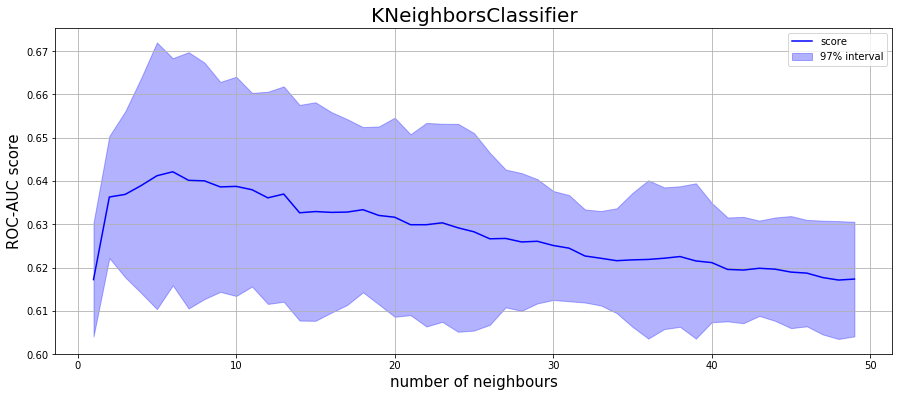

Best cv result 0.6421158628940069 is reached for these parameters: {'n_neighbors': 6}
Maximim radius of confidence interval: 0.03079052778144152


In [28]:
clf = KNeighborsClassifier()
paramGrid = {'n_neighbors': np.arange(1, 50)}
parameterName = "number of neighbours"

GridSearchAndPlot(clf, df_num, y, paramGrid, parameterName)

## 2. Оптимизируем глубину для DecisionTree.

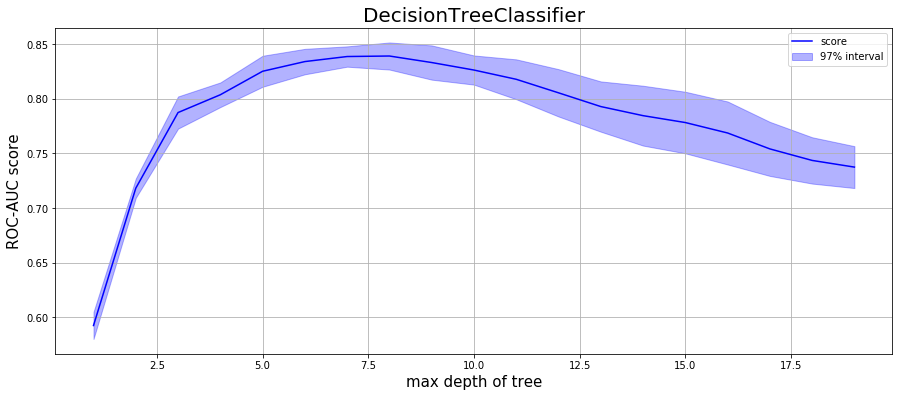

Best cv result 0.8390042892766658 is reached for these parameters: {'max_depth': 8}
Maximim radius of confidence interval: 0.028809352296706565


In [138]:
clf = DecisionTreeClassifier()
paramGrid = {'max_depth': range(1, 20)}
parameterName = "max depth of tree"

GridSearchAndPlot(clf, df_num, y, paramGrid, parameterName)

## 3. Найдём лучшую оптимизируемую функцию для SGD.

Здесь имеется всего 5 параметров, поэтому я не стала соединять точки кривой.

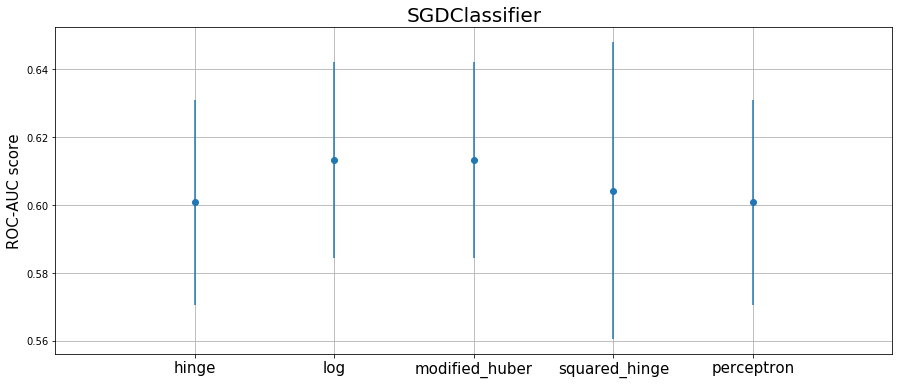

Best cv result 0.6131002335465525 is reached for these parameters: {'loss': 'log'}
Maximim radius of confidence interval: 0.04365147397037963


In [44]:
clf = SGDClassifier(max_iter=500, tol=1e-3, random_state=15)
paramGrid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
parameterName = "loss function"

GridSearchAndPlot(clf, df_num, y, paramGrid, parameterName, discrete=True)

Наибольшее среднее значение качества у DecisionTree, а наибольший радиус доверительного интервала достигается у SGD.

**(0.5 балл) Задание 3.** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

In [204]:
from sklearn import cross_validation, datasets
from sklearn.model_selection import KFold

def GetBestNumberOfTrees(X, y, maxNumberOfTrees):
    kf =  KFold(n_splits=5, shuffle=True, random_state=42)
    rfc = RandomForestClassifier(n_estimators = maxNumberOfTrees, n_jobs = -1)
    final_scores = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        rfc.fit(X_train, y_train)
        scores = []
    
        for tree in rfc.estimators_:
            scores.append(tree.predict_proba(X_test)[:, 1])
        scores = np.cumsum(scores, axis=0)
        current_score = []
    
        for i in range(1, maxNumberOfTrees):
            score = scores[i] / i
            current_score.append(roc_auc_score(y_test, score))
        final_scores.append(current_score)
    
    mean = np.mean(final_scores, axis=0)
    std = np.std(final_scores, axis=0)
    PlotWithConfInterval(np.arange(1, maxNumberOfTrees), 
                         mean, std, "Random Forest", "Number of trees")
    
    best_number = np.mean(final_scores, axis=0).argmax()
    best_result = mean.max()
    
    print ("Best cv result {} is reached for this number of trees: {}".format(best_result, 
                                                                              best_number))
    print("Maximim radius of confidence interval: {}".format(1.96 * max(std)))

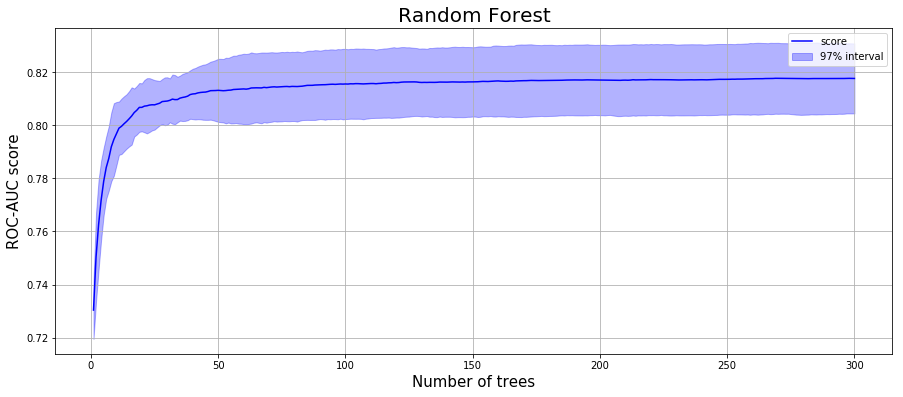

Best cv result 0.8177069499979982 is reached for this number of trees: 268
Maximim radius of confidence interval: 0.01694997359431146


In [205]:
X = df_num.as_matrix()
Y = y.as_matrix().reshape(-1)
GetBestNumberOfTrees(X, Y, 301)

Качество хуже, чем у одного дерева (что странно). Видно, что при числе деревьев, большем 150, качество кросс-валидации стабилизировалось. Возьмём **150**.

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**(1 балл) Задание 4.** Посмотрите на значения признаков *age*, *fnlwgt*, *capital-gain*. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Text(0.5,0,'Capital Gain')

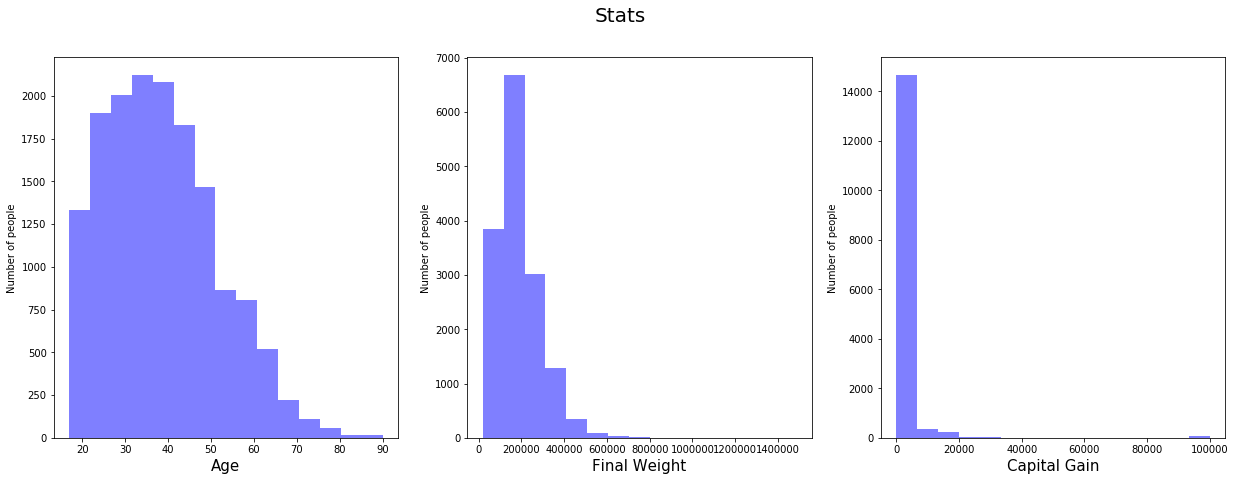

In [190]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

f.suptitle("Stats", fontsize=20)

ax1.set_ylabel('Number of people')
ax1.hist(df_num['age'], bins= 15, color='b', alpha=0.5)
ax1.set_xlabel('Age', fontsize=15)

ax2.set_ylabel('Number of people')
ax2.hist(df_num['fnlwgt'], bins=15,  color='b', alpha=0.5)
ax2.set_xlabel('Final Weight', fontsize=15)

ax3.set_ylabel('Number of people')
ax3.hist(df_num['capital-gain'], bins=15, color='b', alpha=0.5)
ax3.set_xlabel('Capital Gain', fontsize=15)

Данные имеют различные **порядки** (видно по оси x). Это плохо для

а) метода ближайших соседей, так как до нормализации один признак оказывается сильно больше другого, и расстояние зависит в основном от него. После нормализации взаимные расстояния между объектами сильно поменяются, и признаки будут вносить одинаковый вклад.

б) SGD, так как шаги градиентного спуска по возрасту и capital gain должны быть разных порядков. Если признаки одинаковых порядков, то SGD спускается по кругам, а если разных -- то по эллипсам, как на картинке. Поэтому и шаг должен быть разным по разным осям.

После масштабирования SGD должен сходиться быстрее.

Масштабирование не должно повлиять на деревья (и лес, как следствие), так как там важен порядок следования аргументов, а не величина этих аргументов.


Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл) Задание 5.** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled)

## KNN

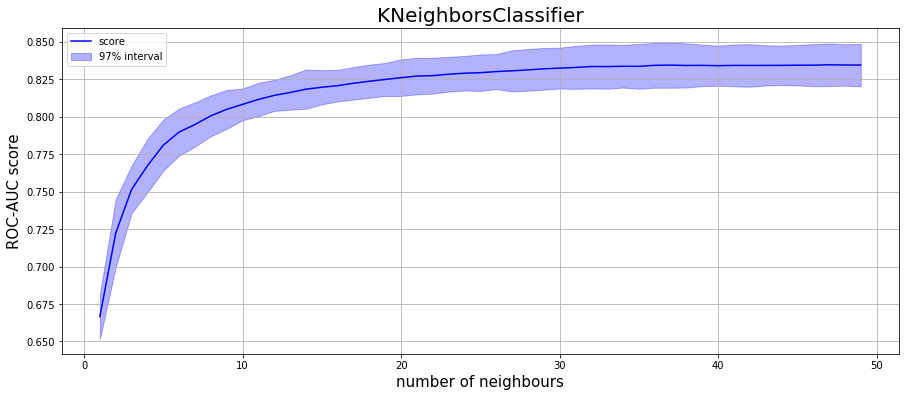

Best cv result 0.8346465831932057 is reached for these parameters: {'n_neighbors': 47}
Maximim radius of confidence interval: 0.022710002384270383


In [192]:
clf = KNeighborsClassifier()
paramGrid = {'n_neighbors': np.arange(1, 50)}
parameterName = "number of neighbours"

GridSearchAndPlot(clf, df_num_scaled, y, paramGrid, parameterName)

## Decision Tree

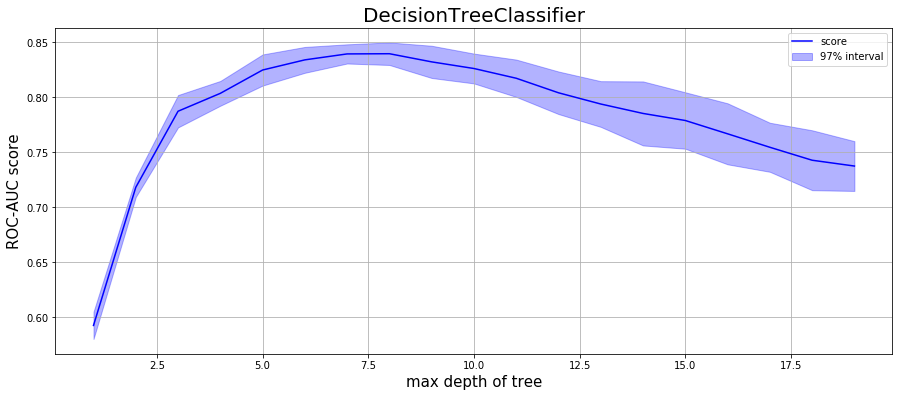

Best cv result 0.8395932645228464 is reached for these parameters: {'max_depth': 8}
Maximim radius of confidence interval: 0.02910534613894831


In [193]:
clf = DecisionTreeClassifier()
paramGrid = {'max_depth': range(1, 20)}
parameterName = "max depth of tree"

GridSearchAndPlot(clf, df_num_scaled, y, paramGrid, parameterName)

## SGD

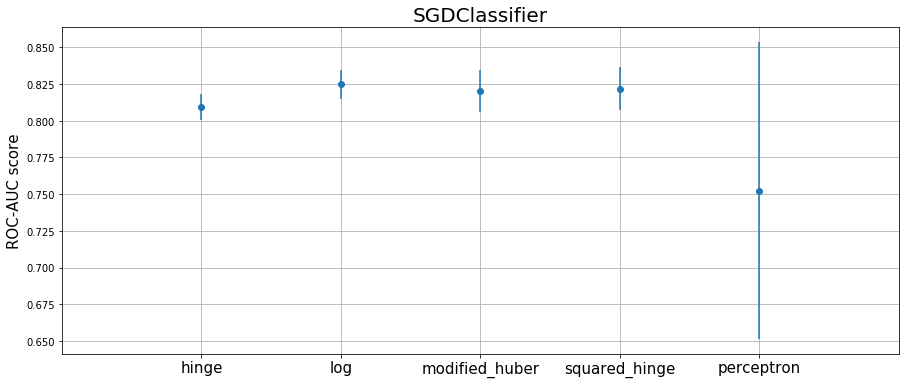

Best cv result 0.8247840900294731 is reached for these parameters: {'loss': 'log'}
Maximim radius of confidence interval: 0.10096418114744293


In [198]:
clf = SGDClassifier(max_iter=500)
paramGrid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
parameterName = "loss function"

GridSearchAndPlot(clf, df_num_scaled, y, paramGrid, parameterName, discrete=True)

## Random Forest

(15347, 6) (15347,)


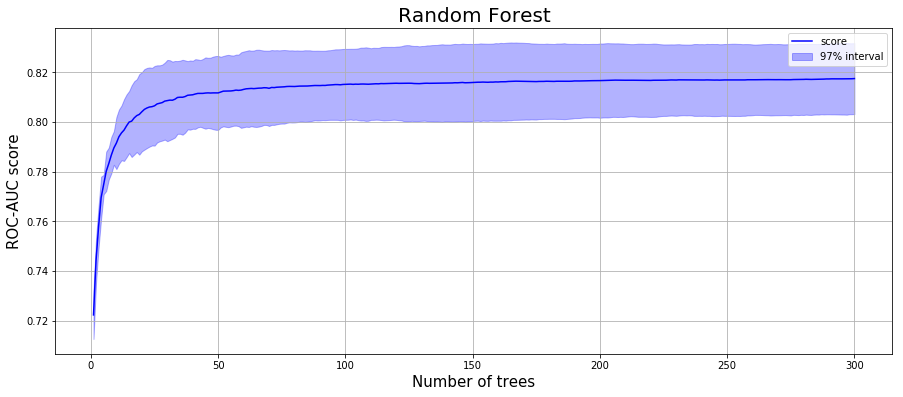

Best cv result 0.8174554032730909 is reached for this number of trees: 299


In [196]:
X = df_num_scaled.as_matrix()
Y = y.as_matrix().reshape(-1)
GetBestNumberOfTrees(X, Y, 301)

Да, **как и ожидалось**, масштабирование сильно повлияло на KNN и SGD, их результаты сильно улучшлись. Стоит, кстати, заметить, что для KNN лучшее качество теперь достигается для 47 соседей, а не для 6, как раньше. Это звучит уже более правдоподобно. На DecisionTree и RandomForest масштабирование не повлияло.

**(1.5 балла) Задание 6.** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

In [248]:
def GridSearch(clf, X_train, y_train, paramGrid):
    kf =  KFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(clf, param_grid=paramGrid, 
                        cv = kf, n_jobs=-1, 
                        scoring= 'roc_auc')
    grid.fit(X_train, y_train)    
    bestParametersIdx = grid.cv_results_['mean_test_score'].argmax()
    print("Best cv result {} is reached for these parameters: \n{}".format(
           max(grid.cv_results_['mean_test_score']),
           grid.cv_results_['params'][bestParametersIdx]
    ))

## KNN

In [249]:
clf = KNeighborsClassifier()
paramGrid = {'n_neighbors' : range(1, 20), 
             'metric' : ['chebyshev', 'euclidean', 'manhattan']}

GridSearch(clf, df_num_sc, y, paramGrid)

Best cv result 0.8273935302574013 is reached for these parameters: 
{'metric': 'manhattan', 'n_neighbors': 19}


## Decision Tree

In [253]:
clf = DecisionTreeClassifier()
paramGrid = {'max_depth': range(1, 20), 'criterion': ['gini', 'entropy']}

GridSearch(clf, df_num_sc, y, paramGrid)

Best cv result 0.8405075490075693 is reached for these parameters: 
{'criterion': 'entropy', 'max_depth': 8}


## SGD

In [254]:
clf = SGDClassifier(max_iter=500)
paramGrid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 
             'penalty' : ['l1', 'l2']}

GridSearch(clf, df_num_sc, y, paramGrid)

Best cv result 0.8247783514275497 is reached for these parameters: 
{'loss': 'log', 'penalty': 'l2'}


## Random Forest

In [255]:
clf = RandomForestClassifier(n_estimators = 150, n_jobs = -1)
paramGrid = {'criterion': ['gini', 'entropy'], 'max_features' : range(1, 5)}

GridSearch(clf, df_num_sc, y, paramGrid)

Best cv result 0.8185142343729065 is reached for these parameters: 
{'criterion': 'entropy', 'max_features': 4}


Наилучшее качество показало Decision Tree (0.84), остальные имеют примерно одинаковое качество (0.82).

**(1.5 балла) Задание 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

 Код для рисования графика [взят отсюда](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py).

In [160]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 6)):
    plt.figure(figsize=(10, 5))
    plt.title(title, fontsize=15)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## KNN

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

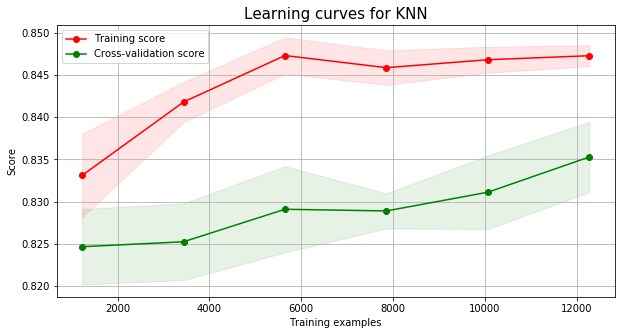

In [163]:
clf = KNeighborsClassifier(metric='manhattan', n_neighbors=19)

X = df_num_scaled.as_matrix()
Y = y.as_matrix().reshape(-1)

plot_learning_curve(clf, "Learning curves for KNN", X, y, 
                    cv=KFold(n_splits=5, shuffle=True, random_state=42))

## Descion Tree

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

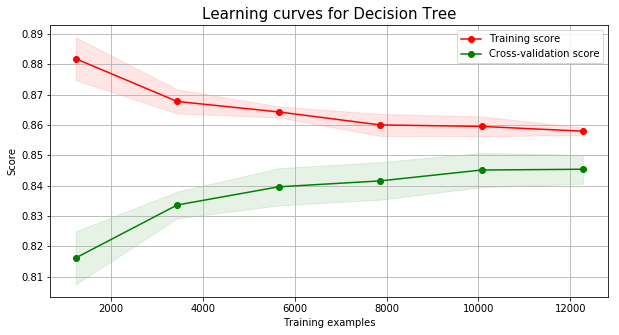

In [164]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)

X = df_num_scaled.as_matrix()
Y = y.as_matrix().reshape(-1)

plot_learning_curve(clf, "Learning curves for Decision Tree", X, y, 
                    cv=KFold(n_splits=5, shuffle=True, random_state=42))

## SGD

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

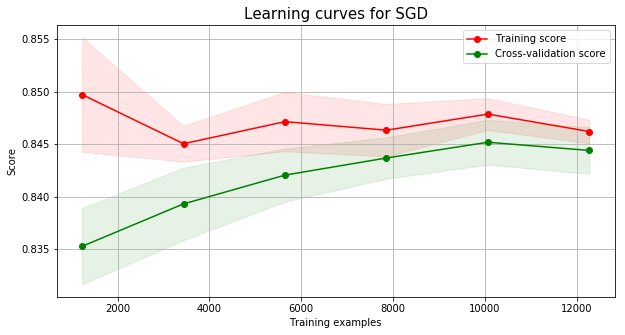

In [169]:
clf = SGDClassifier(loss='log', penalty='l2', max_iter=500)

X = df_num_scaled.as_matrix()
Y = y.as_matrix().reshape(-1)

plot_learning_curve(clf, "Learning curves for SGD", X, y,
                    cv=KFold(n_splits=5, shuffle=True, random_state=42))

## Random Forest

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

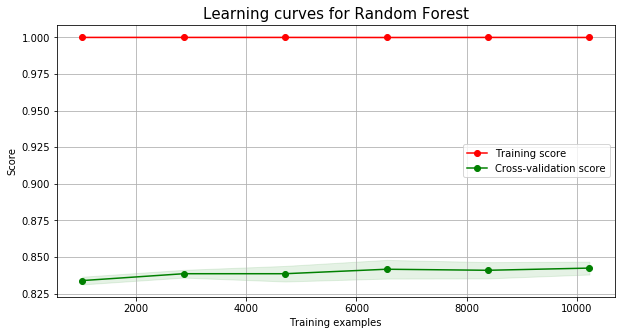

In [166]:
clf = RandomForestClassifier(criterion='entropy', max_features=4,
                             n_estimators=150, n_jobs=-1)

X = df_num_scaled.as_matrix()
Y = y.as_matrix().reshape(-1)

plot_learning_curve(clf, "Learning curves for Random Forest", X, y)

**Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?**

На обучающей -- может, это хорошо видно на примере обучающего дерева. С ним проблема такая: на малом числе объектов дерево способно запомнить всю выборку и показать высокий результат обучения (низкое качество на тестовой выборке при малом числе объектов это подтверждает). При росте числа объектов качество на тестовой выборке растёт, а на обучающей -- падает, и они приходят к одной асимптоте.

На тестовой качество должно возрастать (асимптотически), иначе алгоритм работает неверно. Однако могут быть небольшие падения на промежуточных точках.

**Для каких целей можно использовать знание качества на обучающей части выборки?**

Если результаты на обучающей выборке высоки, а на тестовой сильно хуже, то это может означать, что модель переобучилась. Так что знание качества на тестовой выборке может помочь контролировать переобучение модели. Ещё знание качества можно использовать для определения момента, когда нужно прерывать обучение. Если качество на обучающей выборке больше не изменяется, то учиться дальше незачем.

**Какой из алгоритмов лучше обучается на меньшем числе объектов?**

Качество обучения классификатора -- это, как мне кажется, результат его работы на тестовых данных, потому что иначе идеальный классификатор -- это тот, который тупо запомнил всю обучающую выборку. Поэтому посмотрим на графики и выберем тот алгоритм, который имеет лучший результат на тестовой выборке при числе объектов менее 2000. Таким классификатором оказывается SGD c результатом 0.8035 в самой левой точке.

**Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?**

Видно, что для Random Forest и Decision Tree произошло насыщение -- их графики на тестовой и обучающей выборке примерно стабилизировались к некоторой константе уже после 10 000 объектов. Для SGD кажется, что тоже произошло насыщение -- после 10 000 объектов график стал убывать. А вот для KNN добавление объектов вполне может оказаться выгодным, что следует из алгоритма этой модели -- она запоминает выборку. 


### (2 балла) Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла) Задание 8.** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

In [17]:
df = pd.read_csv('data.adult.csv')
df = df.replace("?", np.NaN).dropna()
df.index = range(df.shape[0])

df['>50K,<=50K'] = np.where(df['>50K,<=50K'] == ">50K", 1, 0)
y_train = df['>50K,<=50K']
df.drop('>50K,<=50K', 1, inplace=True)

categorial = pd.get_dummies(df)
categorial.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,34,284843,9,594,0,60,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,40,190290,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,36,177858,13,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,22,184756,10,0,0,30,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,47,149700,13,15024,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем подбирать заново оптимальные гиперпараметры для моделей с учетом новых признаков (хотя правильнее было бы это сделать). 

**(1.5 балла) Задание 9.** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

In [18]:
categorial.drop(['age', 
                 'fnlwgt', 
                 'education-num', 
                 'capital-gain', 
                 'capital-loss', 
                 'hours-per-week'], 1, inplace=True)

df_num_scaled = df_num_scaled.join(categorial)

In [19]:
df_num_scaled.head()

,0,1,2,3,4,5,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


Теперь обучим алгоритмы и посмотрим на среднее качество.

In [21]:
from sklearn.model_selection import cross_val_score

## KNN

In [22]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=19, metric='manhattan'), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        cv=5))

0.8841650388058534

## Decision Tree

In [23]:
np.mean(cross_val_score(DecisionTreeClassifier(max_depth=8, criterion='entropy'), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        cv=5))

0.88971861947418307

## SGD

In [24]:
np.mean(cross_val_score(SGDClassifier(loss='log', penalty='l2', max_iter=500), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        cv=5))

0.90352656897102146

## Random Forest

In [25]:
np.mean(cross_val_score(RandomForestClassifier(criterion='entropy', max_features=4,
                        n_estimators=150, n_jobs=-1), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        cv=5))

0.8970020170968338

Прирост качества сильно заметен для всех алгоритмов. Здесь **наилучшим классификатором оказался SGD**, его результат -- 0.9035. Интересно также, что раньше Random Forest был хуже по качеству, чем Decision Tree, однако сейчас ему удалось его обогнать, и стать вторым после SGD.

### (3 балла) Смешивание моделей (blending)

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(2 балла) Задание 10.**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [88]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

class Blending(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha=0.1):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
        self.classes_ = None

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)

        # Return the classifier
        return self

    def predict_proba(self, X):
        X = check_array(X)
        return self.alpha * self.clf1.predict_proba(X) + (1 - self.alpha) * self.clf2.predict_proba(X)
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [113]:
from sklearn.model_selection import train_test_split


sgd = SGDClassifier(loss='log', penalty='l2', max_iter=500)
rfc = RandomForestClassifier(criterion='entropy', max_features=4,
                            n_estimators=150, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(df_num_scaled, y,
                                                    test_size=0.33, random_state=42)

blending = Blending(sgd, rfc, 0.1)
blending.fit(X_train, y_train)
print("roc_auc_score: ", roc_auc_score(y_test, blending.predict_proba(X_test)[:, 1]))

roc_auc_score:  0.899638233862


**(1 балл) Задание 11.** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

Попробуем смешать Random Forest и SGD.

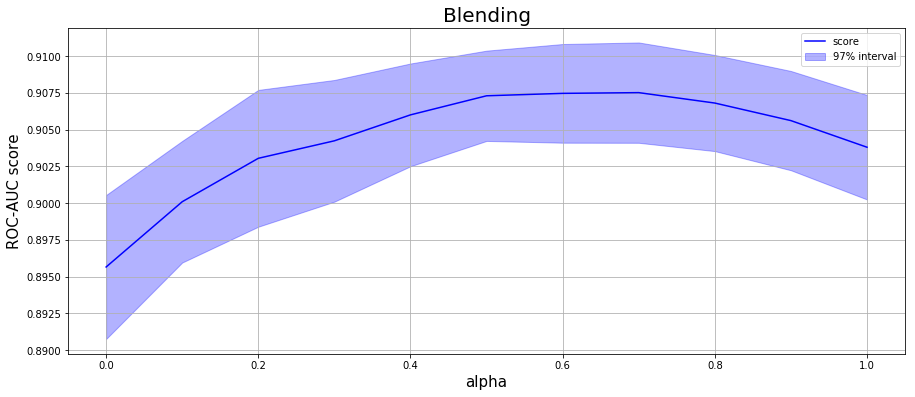

Best cv result 0.9075200902286399 is reached for these parameters: {'alpha': 0.70000000000000007}
Maximim radius of confidence interval: 0.004899165473404314


In [134]:
sgd = SGDClassifier(loss='log', penalty='l2', max_iter=500)
rfc = RandomForestClassifier(criterion='entropy', max_features=4,
                            n_estimators=150, n_jobs=-1)

paramGrid={'alpha' : np.linspace(0.0, 1.0, num=11)}
parameterName = 'alpha'

GridSearchAndPlot(Blending(sgd, rfc), df_num_scaled, y, paramGrid, parameterName)

Качество вышло высоким, но случайный лес обучается довольно долго. Попробуем SGD и Decision Tree.

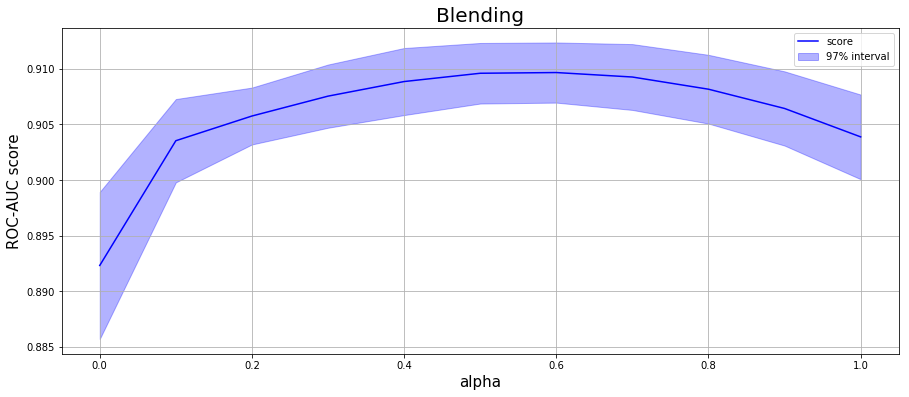

Best cv result 0.9096739325799003 is reached for these parameters: {'alpha': 0.60000000000000009}
Maximim radius of confidence interval: 0.006616469588743097


In [94]:
sgd = SGDClassifier(loss='log', penalty='l2', max_iter=500)
tree = DecisionTreeClassifier(max_depth=8, criterion='entropy')

paramGrid={'alpha' : np.linspace(0.0, 1.0, num=11)}
parameterName = 'alpha'

GridSearchAndPlot(Blending(sgd, tree), df_num_scaled, y, paramGrid, parameterName)

Качество оказалось даже лучше (но доверительный интервал шире). Так что имеет смысл смешивать SGD и Decision Tree, хоть Decision Tree и было на третьем месте при последнем сравнении (но с очень небольшим отрывом).

Простой блендинг моделей может повлиять на итоговое качество из-за того, что обобщающая способность взвешенной суммы моделей выше, чем обобщающая способность каждой из моделей в отдельности.

## (2 балла) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей правильным продолжением является сравнение их между собой. На семинаре по визуализации вам было показано как строить "ящик с усами" (диаграмму размаха). Воспользуемся ей для сравнения алгоритмов между собой. 

**(2 балла) Задание 12.** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели, выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [139]:
knn = cross_val_score(KNeighborsClassifier(n_neighbors=19, metric='manhattan'), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        n_jobs=-1, cv=20)

tree = cross_val_score(DecisionTreeClassifier(max_depth=8, criterion='entropy'), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        n_jobs=-1, cv=20)

sgd = cross_val_score(SGDClassifier(loss='log', penalty='l2', max_iter=500), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        n_jobs=-1, cv=20)

rf = cross_val_score(RandomForestClassifier(criterion='entropy', max_features=4,
                        n_estimators=150, n_jobs=-1), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        n_jobs=-1, cv=20)

blend = cross_val_score(Blending(SGDClassifier(loss='log', penalty='l2', max_iter=500),
                        DecisionTreeClassifier(max_depth=8, criterion='entropy'), 0.6), 
                        df_num_scaled, y, 
                        scoring='roc_auc', 
                        n_jobs=-1, cv=20)

In [174]:
data = np.array([knn, tree, rf,  sgd, blend]).T
columns = ['knn', 'decision tree', 'random forest', 'sgd', 'blending']
data = pd.DataFrame(data=data, columns=columns)
data

,knn,decision tree,random forest,sgd,blending
0,0.866718,0.888356,0.883862,0.891312,0.900148
1,0.883675,0.886600,0.898611,0.898984,0.903749
2,0.875497,0.889743,0.898313,0.896717,0.904682
3,0.892699,0.903602,0.904549,0.909109,0.916755
4,0.896361,0.912288,0.896321,0.910443,0.919048
5,0.886702,0.886702,0.900002,0.913661,0.916150
6,0.884369,0.876203,0.896619,0.893259,0.904256
7,0.898713,0.915482,0.915326,0.920064,0.924980
8,0.903331,0.924490,0.912637,0.922184,0.929379
9,0.902231,0.915024,0.905152,0.913688,0.922593


Text(0.5,1,'Box plot for all models')

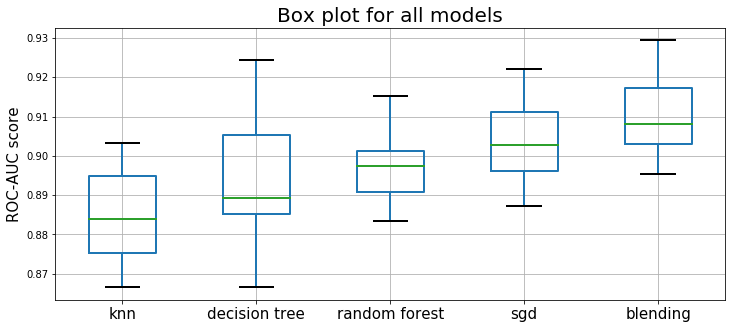

In [175]:
ax = data.boxplot(figsize=(12,5), return_type='axes', sym='k.')
_ = plt.setp(ax.lines, linewidth=2.0)
plt.ylabel("ROC-AUC score", fontsize=15)
plt.xticks(fontsize=15)
plt.title("Box plot for all models", fontsize=20)

## Общие выводы

На рисунке все классификаторы расположены в порядке роста качества. Самое высокое качество показывает blending для SGD и Decision Tree. У Random Forest самая малая дисперсия по качеству (качество сгладилось из-за большого числа входящих деревьев). А у Decision Tree и KNN самая большая дисперсия. 

Дальше будет общий обзор всех действий, предпринятых в данной работе. Параметры будут упоминаться только те, которые были использованы в этой работе, и будут указаны их **итоговые лучшие значения **.

**KNN**

Параметры: n_neighbors = 19, metric = 'manhattan' 

Для KNN самый большой прирост качества дало масштабирование признаков -- скачок от 0.64 до 0.83. Увеличение числа параметров дало не очень большой прирост, добавление категориальных признаков дало второй по величине рывок в качестве.

**Decision Tree**

Параметры: criterion = 'entropy', max_depth = 8

Для Decision Tree наиболее важным действием из предпринятых оказалось добавление категориальных признаков -- с 0.842 до 0.889. В остальных случаях прирост качества был небольшим.

**SGD**

Параметры: loss = 'log', 'penaulty' = 'l2'

Масштабирование сильно подняло качество SGD -- c 0.61 до 0.82. Увеличение числа параметров дало небольшой прирост. Дальше скачок произошёл после добавления категориальных признаков -- с 0.82 до 0.9035. 

**Random Forest**

Параметры: criterion = 'entropy', max_features = 4, n_estimators = 150.

При первых трех этапах обработки почти не было роста качества. Лесу больше всего помогло добавление категориальных признаков -- скачок с 0.82 до 0.897. 

**Blending**

Параметры: clf1 = SGD, clf2 = Decision Tree, alpha = 0.6.

Был взят для clf1 и clf2 и alpha = 0.6 на масштабированных признаках и векторизированных категориальных. Показал наилучшее качество по сравнению со всеми остальными классификаторами на всех этапах: 0.9096. Это связано с тем, что обобщающая способность взвешенной суммы моделей выше, чем обобщающая способность каждой из моделей в отдельности.